# <center>DAT407 Assignment 2 – Group 19</center>
### <center>Avinash Shukla - 12 hours</center>
### <center>Josef Rasheed - 12 hours</center>
### <center>April 11, 2023</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.metrics import ConfusionMatrixDisplay

# Question 1A

Find a linear regression model that relates the living area to the selling price. If you did any data cleaning step(s), describe what you did and explain why.

We cleaned 2 points that were not relevant.

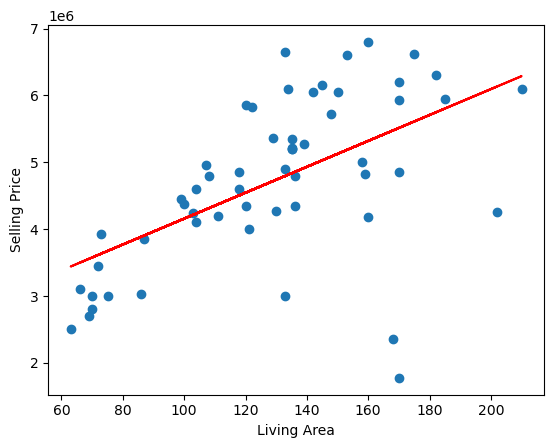

In [2]:
df = pd.read_csv("data_assignment2.csv")
X = df['Living_area'].values.reshape(-1, 1)
y = df['Selling_price'].values.reshape(-1, 1)

# A linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the predicted values
y_pred = model.predict(X)

# Plot the scatter plot and the regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Living Area')
plt.ylabel('Selling Price')
plt.show()

In [3]:
df = df[(df['Living_area'] < 160) & (df['Selling_price'] > 3000000)]
print(df)

    ID  Living_area  Rooms  Land_size  Biarea  Age  Selling_price
0    1          104    5.0      271.0    25.0   33        4600000
1    2           99    5.0     1506.0     6.0   88        4450000
2    3          133    6.0      486.0     NaN   44        4900000
4    5          118    6.0     1506.0     NaN   29        4600000
5    6          133    6.0      823.0     NaN   12        6650000
7    8          134    6.0     1593.0    49.0   57        6100000
10  11          121    4.0     1575.0   112.0   81        4000000
11  12          136    6.0      381.0     NaN   42        4350000
12  13           86    4.0     1529.0    30.0   90        3025000
13  14          135    6.0      334.0     8.0   45        5215000
14  15          130    5.0     2095.0     NaN   63        4275000
15  16          104    5.0      399.0    13.0   59        4100000
16  17           66    2.0     1655.0    20.0   90        3100000
17  18          129    5.0      414.0    21.0   32        5370000
20  21    

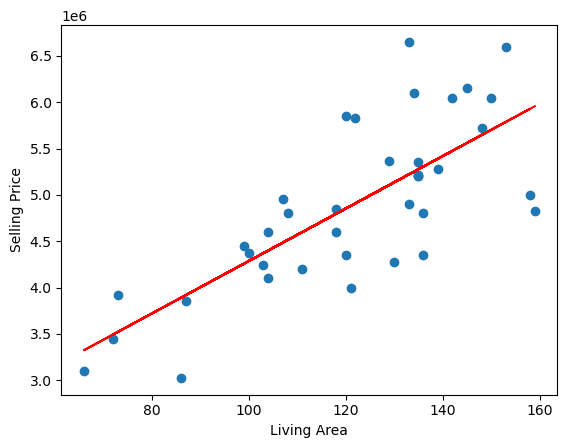

In [4]:
X = df['Living_area'].values.reshape(-1, 1)
y = df['Selling_price'].values.reshape(-1, 1)

# a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the predicted values
y_pred = model.predict(X)

# Plot the scatter plot and the regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Living Area')
plt.ylabel('Selling Price')
plt.show()

# Question 1B

What are the values of the slope and intercept of the regression line?

In [5]:
print('Slope:', model.coef_[0])
print('Intercept:', model.intercept_)
# We get a slope of follwing

Slope: [28309.02654246]
Intercept: [1455269.52101299]


# Question 1C

Use this model to predict the selling prices of houses which have living area:
    10 m2, 100 m2, 150 m2, 200 m2, 1000 m2

In [6]:
X = df[['Living_area']].values
y = df['Selling_price']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)

# Use the model to make a prediction for a 100m2 home
area10 = 10
X_new10 = [[area10]]
y_new10 = model.predict(X_new10)

area100 = 100
X_new100 = [[area100]]
y_new100 = model.predict(X_new100)

area150 = 150
X_new150 = [[area150]]
y_new150 = model.predict(X_new150)

area200 = 200
X_new200 = [[area200]]
y_new200 = model.predict(X_new200)

area1000 = 1000
X_new1000 = [[area1000]]
y_new1000 = model.predict(X_new1000)

# Print the predicted value for the 100m2 home
print(f"The predicted selling price for a {area10}m2 house is {y_new10[0]:1.0f}")
print(f"The predicted selling price for a {area100}m2 house is {y_new100[0]:1.0f}")
print(f"The predicted selling price for a {area150}m2 house is {y_new150[0]:1.0f}")
print(f"The predicted selling price for a {area200}m2 house is {y_new200[0]:1.0f}")
print(f"The predicted selling price for a {area1000}m2 house is {y_new1000[0]:1.0f}")

The predicted selling price for a 10m2 house is 1478162
The predicted selling price for a 100m2 house is 4209501
The predicted selling price for a 150m2 house is 5726911
The predicted selling price for a 200m2 house is 7244321
The predicted selling price for a 1000m2 house is 31522883


# Question 1D

Draw a residual plot.

A residual is the difference between an observed value and a predicted value.

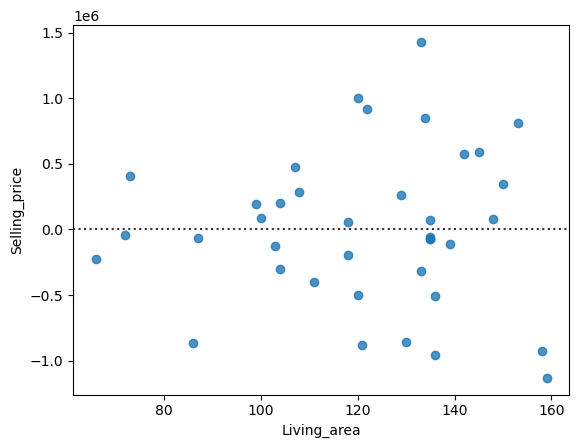

In [7]:
sns.residplot(x='Living_area', y='Selling_price', data=df)
plt.show()

# Question 1E

Is this a useful model? 
Are there any limitations? 
What could you do to improve the models ability to predict selling prices? 
Can this model be used in other areas than Landvetter?

This model is created from 2 varibales, apart from these we should consider other variable also. 
For example newly constructed house is more valuable compared to old house. 
If any house land size is huge then it is more valuable than smaller land size. 
We ignored important variables.

# Question 2A

Visualise the data. Can you gain any insights from the visualisation?

In [8]:
# Rows are samples (Setosa, Versicolour, Virginica) 
# Columns are (Sepal Length, Sepal Width, Petal Length, Petal Width)
iris = load_iris() #as_frame=True
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


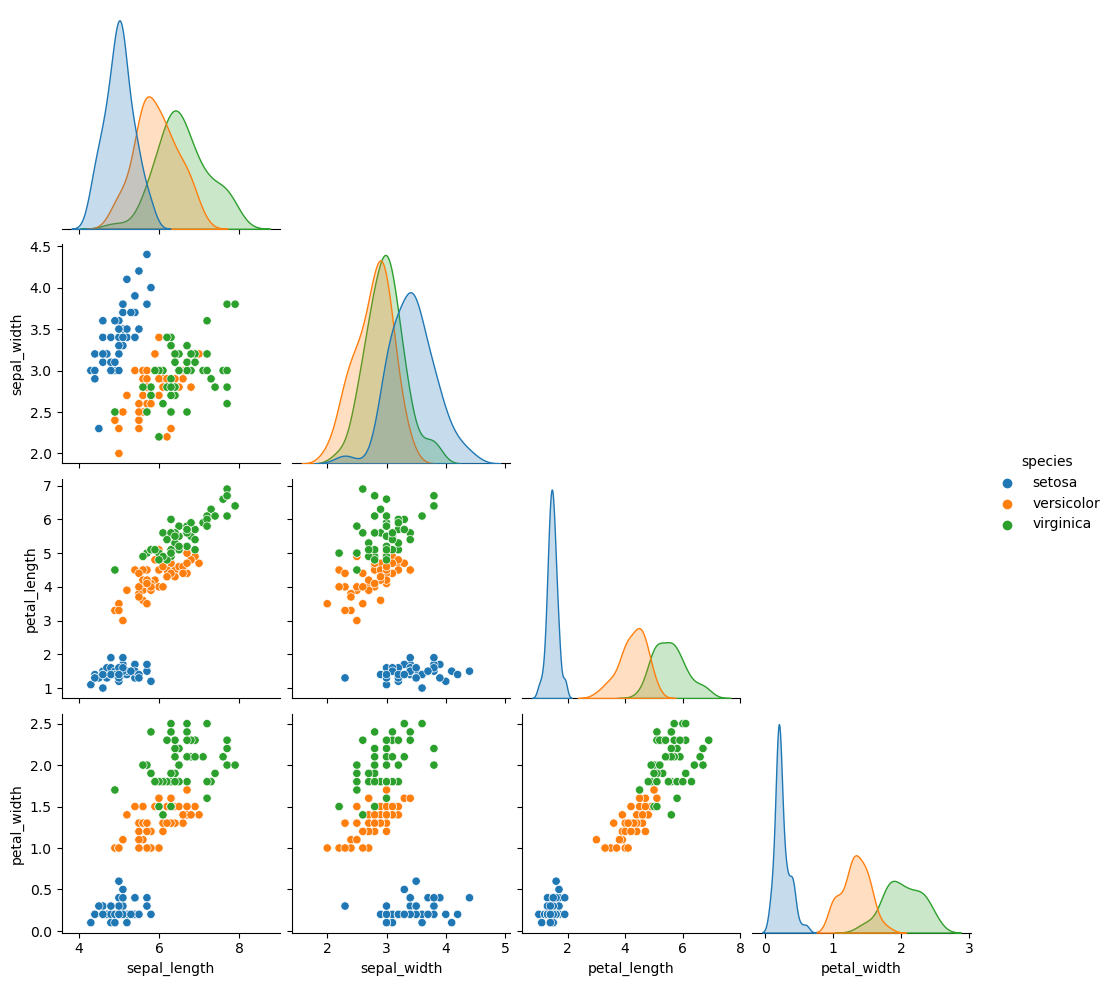

In [9]:
# A pairs plot for features [1]
iris_df = sns.load_dataset("iris")
sns.pairplot(iris_df, hue='species', corner=True)

The visualisation shows distinct feature groupings for different species. This is good since we can now assume that there are atleast some conclusions we can draw from this data.

# Question 2B

Use a confusion matrix to evaluate the use of logistic regression to classify the
iris data set.

In [25]:
# Split dataset into training set (75%) and test set (25%)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

In [26]:
logisticRegr = LogisticRegression(max_iter=200)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [27]:
# Predictions for the entire test data
predictions = logisticRegr.predict(X_test)

In [28]:
# The accuracy of the model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9210526315789473


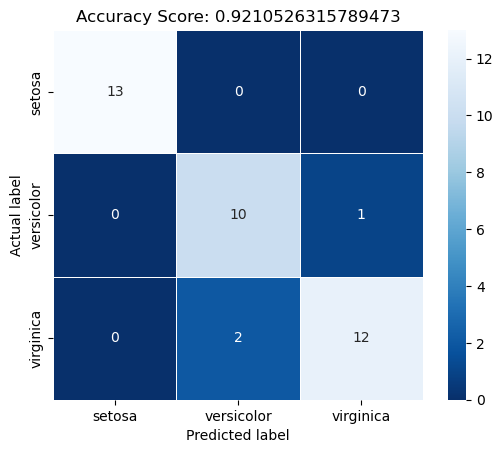

In [29]:
# Making a confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)

labels = ['setosa', 'versicolor', 'virginica']
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=labels, yticklabels=labels);
            
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score_title = 'Accuracy Score: {0}'.format(score)
plt.title(score_title, size = 12);

plt.show();

# Question 2C

Use k-nearest neighbours to classify the iris data set with some different
values for k, and with uniform and distance-based weights.

In [30]:
#  Make knn models
def make_knn_model(n_neighbors, weights, cm=False):
    # Create an instance of KNeighborsClassifier and fit the data
    knn = KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
        
    # Test name
    print("k = ", n_neighbors, " weights = ", weights)
    # Model Accuracy
    score = knn.score(X_test, y_test)
    print("Accuracy:", score)
    
    if cm==True:
        # Plots Confusion Matrix
        cm = ConfusionMatrixDisplay.from_estimator(
            knn,
            X_test,
            y_test,
            display_labels=iris.target_names,
            cmap=plt.cm.Blues,
            normalize=None,
        )
        # Model Accuracy
        score_title = 'Accuracy Score: {0}'.format(score)
        cm.ax_.set_title(score_title)

In [31]:
make_knn_model(1, 'uniform')
make_knn_model(1, 'distance')
print()

make_knn_model(2, 'uniform')
make_knn_model(2, 'distance')
print()

make_knn_model(5, 'uniform')
make_knn_model(5, 'distance')
print()

make_knn_model(15, 'uniform')
make_knn_model(15, 'distance')
print()

make_knn_model(30, 'uniform')
make_knn_model(30, 'distance')
print()

make_knn_model(60, 'uniform')
make_knn_model(60, 'distance')
print()

k =  1  weights =  uniform
Accuracy: 0.9473684210526315
k =  1  weights =  distance
Accuracy: 0.9473684210526315

k =  2  weights =  uniform
Accuracy: 0.868421052631579
k =  2  weights =  distance
Accuracy: 0.9473684210526315

k =  5  weights =  uniform
Accuracy: 0.8947368421052632
k =  5  weights =  distance
Accuracy: 0.9210526315789473

k =  15  weights =  uniform
Accuracy: 0.9736842105263158
k =  15  weights =  distance
Accuracy: 0.9473684210526315

k =  30  weights =  uniform
Accuracy: 0.9210526315789473
k =  30  weights =  distance
Accuracy: 0.9210526315789473

k =  60  weights =  uniform
Accuracy: 0.868421052631579
k =  60  weights =  distance
Accuracy: 0.9473684210526315



What will happen when k grows larger for the different cases?

    For uniform weight, the accuracy decreaces the as k grows. It seems to have the best accuracy at around k = 15.
    
    For distance weight, the accuracy decreaces the as k grows but is more stable than uniform weight. It seems to have the best accuracy at around k = 1.
    
Why does this happen? What do you think is the best choice of k?

    We should use the values that cost the least while still delevering good accuracy, so k = 15 and uniform wheight is the cheapest and most accurate.

Compute a confusion matrthe accuracy decreaces the as k growsix for the best uniform and distance-based classifiers

k =  1  weights =  uniform
Accuracy: 0.9473684210526315


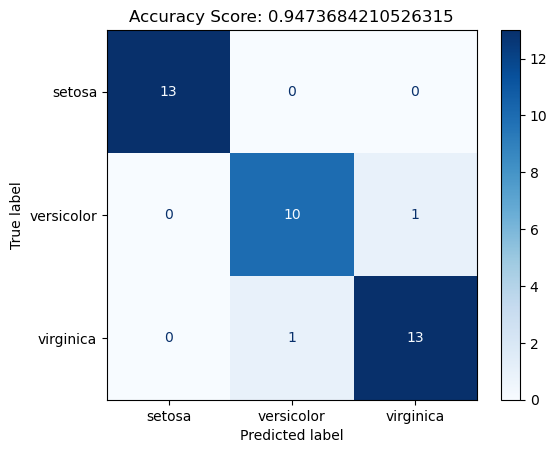

In [32]:
make_knn_model(1, 'uniform', cm=True)

k =  1  weights =  distance
Accuracy: 0.9473684210526315


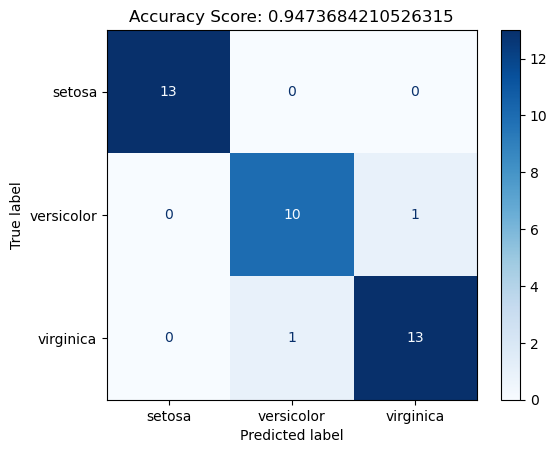

In [33]:
make_knn_model(1, 'distance', cm=True)

# Question 2D

Compare the logistic regression classifier in (a) with the k-nearest neighbour
classifiers in (b). What do you observe? Are all classes equally challenging for
the models to predict?

k =  60  weights =  uniform
Accuracy: 0.868421052631579


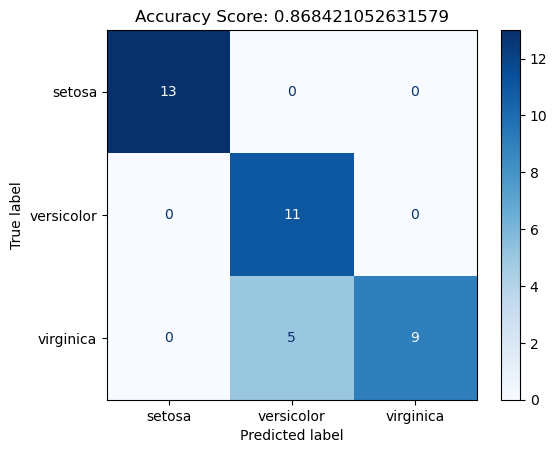

In [34]:
make_knn_model(60, 'uniform', cm=True)

k =  60  weights =  distance
Accuracy: 0.9473684210526315


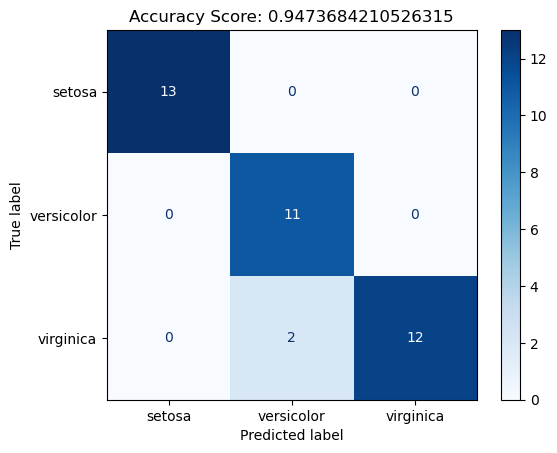

In [35]:
make_knn_model(60, 'distance', cm=True)

Using "k-nearest neighbour" with k = 15 and uniform wheights has a better accuracy than "logistic regression".
It seems both classifiers had the most trouble with The virginica class as they sometimes missclassified it as versicolor.

## References

[1] Seaborn, Pairplot, https://seaborn.pydata.org/generated/seaborn.pairplot.html